In [1]:
import numpy as np  # for numerics (matrix math)
from scipy.sparse import diags  # for numerics (creating diagonal matrix)
from scipy.stats import gaussian_kde  # for numerics (DOS)
import matplotlib.pyplot as plt  # for plotting

# for vector plots:
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
def make_disp(E0, t, a):
    def f(k):
        return E0 + 2*t*np.sum(np.cos(k * a), axis=1)
    return f

E = make_disp(0, -1, np.pi)  # E = E(k)

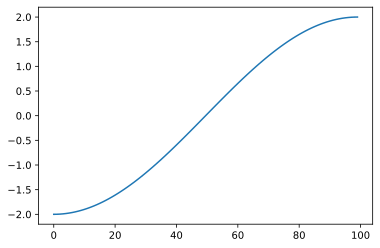

In [3]:
k_path = np.linspace((0,),(1),100)
plt.plot(E(k_path))

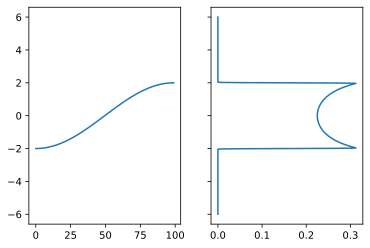

In [4]:
fig, axs = plt.subplots(ncols=2, sharey=True)
k_mesh = np.mgrid[0:1:1000j].reshape(2,-1).T
es = E(k_mesh)

xrange = np.linspace(-6, 6, 1000)
axs[1].plot(gaussian_kde(es, 0.01).pdf(xrange), xrange)
axs[0].plot(E(k_path))

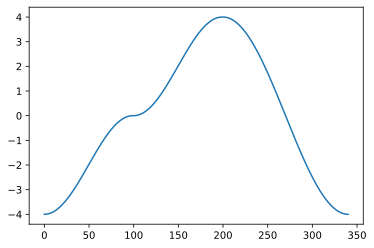

In [5]:
k_path = np.vstack([np.linspace((0,0),(1,0),100),
                    np.linspace((1,0),(1,1),100),
                    np.linspace((1,1),(0,0),int(np.sqrt(2)*100)),
                  ])
plt.plot(E(k_path))

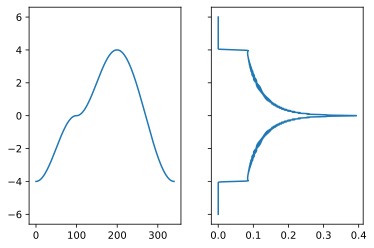

In [6]:
fig, axs = plt.subplots(ncols=2, sharey=True)
axs[0].plot(E(k_path))
k_mesh = np.mgrid[0:1:100j, 0:1:100j].reshape(2,-1).T
es = E(k_mesh)
axs[1].plot(gaussian_kde(es, 0.01).pdf(xrange), xrange)

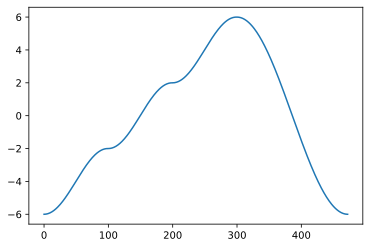

In [7]:
k_path = np.vstack([np.linspace((0,0,0),(1,0,0),100),
                    np.linspace((1,0,0),(1,1,0),100),
                    np.linspace((1,1,0),(1,1,1),100),
                    np.linspace((1,1,1),(0,0,0),int(np.sqrt(3)*100)),
                  ])
plt.plot(E(k_path))

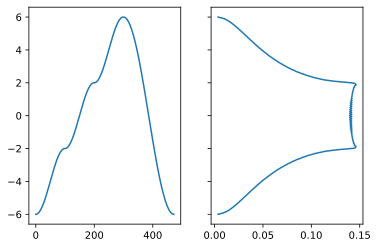

In [8]:
fig, axs = plt.subplots(ncols=2, sharey=True)
axs[0].plot(E(k_path))
k_mesh = np.mgrid[0:1:50j, 0:1:50j, 0:1:50j].reshape(3,-1).T
es = E(k_mesh)
axs[1].plot(gaussian_kde(es, 0.02).pdf(xrange), xrange)

In [9]:
def chain(N, E0, t):
    return diags([(N-1)*[t], N*[E0], (N-1)*[t]], (-1, 0, 1)).todense()

# No impurity

In [10]:
H_chain = chain(1001, 0, 2.5)

In [11]:
ew, ev = np.linalg.eigh(H_chain)

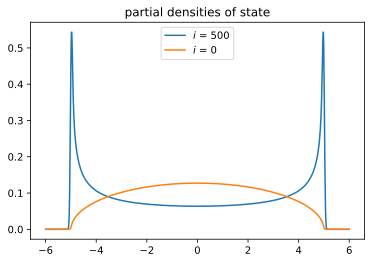

In [12]:
weight1 = np.abs(ev.A[500])**2
weight2 = np.abs(ev.A[0])**2

xrange = np.linspace(-6, 6, 1000)
pdos1 = gaussian_kde(ew, 0.01, weights=weight1).pdf(xrange)
pdos2 = gaussian_kde(ew, 0.01, weights=weight2).pdf(xrange)

plt.plot(xrange, pdos1,
         label='$i$ = 500')
plt.plot(xrange, pdos2,
         label='$i$ = 0')
plt.title('partial densities of state')
plt.legend()

# Impurity at site N/2

In [13]:
H_chain = chain(1001, 0, 2.5)
i_imp = 500
H_chain[i_imp, i_imp] = -2
ew, ev = np.linalg.eigh(H_chain)

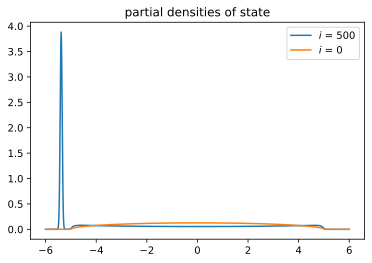

In [14]:
weight1 = np.abs(ev.A[500])**2
weight2 = np.abs(ev.A[0])**2

pdos1 = gaussian_kde(ew, 0.01, weights=weight1).pdf(xrange)
pdos2 = gaussian_kde(ew, 0.01, weights=weight2).pdf(xrange)

plt.plot(xrange, pdos1,
         label='$i$ = 500')
plt.plot(xrange, pdos2,
         label='$i$ = 0')
plt.title('partial densities of state')
plt.legend()
f, ax = plt.gcf(), plt.gca()

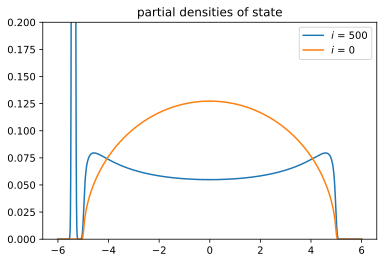

In [15]:
ax.set_ylim(0, 0.2)
f

# Impurity at site 0

In [16]:
H_chain = chain(1001, 0, 2.5)
i_imp = 0
H_chain[i_imp, i_imp] = -2
ew, ev = np.linalg.eigh(H_chain)
H_chain

matrix([[-2. ,  2.5,  0. , ...,  0. ,  0. ,  0. ],
        [ 2.5,  0. ,  2.5, ...,  0. ,  0. ,  0. ],
        [ 0. ,  2.5,  0. , ...,  0. ,  0. ,  0. ],
        ...,
        [ 0. ,  0. ,  0. , ...,  0. ,  2.5,  0. ],
        [ 0. ,  0. ,  0. , ...,  2.5,  0. ,  2.5],
        [ 0. ,  0. ,  0. , ...,  0. ,  2.5,  0. ]])

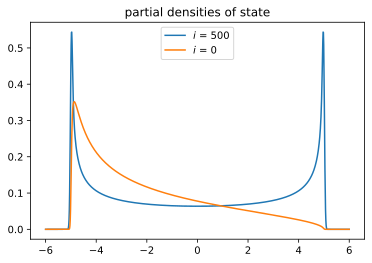

In [17]:
weight1 = np.abs(ev.A[500])**2
weight2 = np.abs(ev.A[0])**2

xrange = np.linspace(-6, 6, 1000)
pdos1 = gaussian_kde(ew, 0.01, weights=weight1).pdf(xrange)
pdos2 = gaussian_kde(ew, 0.01, weights=weight2).pdf(xrange)

plt.plot(xrange, pdos1,
         label='$i$ = 500')
plt.plot(xrange, pdos2,
         label='$i$ = 0')
plt.title('partial densities of state')
plt.legend()

In [18]:
def imp(delta, i_imp=0):
    H_chain = chain(1001, 0, 2.5)
    H_chain[i_imp, i_imp] = delta
    ew, ev = np.linalg.eigh(H_chain)
    
    weight1 = np.abs(ev.A[500])**2
    weight2 = np.abs(ev.A[0])**2

    xrange = np.linspace(-6, 6, 1000)
    pdos1 = gaussian_kde(ew, 0.01, weights=weight1).pdf(xrange)
    pdos2 = gaussian_kde(ew, 0.01, weights=weight2).pdf(xrange)

    plt.plot(xrange, pdos1,
             label='$i$ = 500')
    plt.plot(xrange, pdos2,
             label='$i$ = 0')
    plt.title(f'partial densities of state\nBound state energy difference: {ew[1]-ew[0]:.2f}eV')
    plt.legend()

In [19]:
from ipywidgets import interact, FloatSlider, IntSlider
i = interact(imp, 
             delta=FloatSlider(-2, min=-5, max=2, step=0.25, continuous_update=False),
             i_imp=IntSlider(0, min=0, max=500, step=1, continuous_update=False))

interactive(children=(FloatSlider(value=-2.0, continuous_update=False, description='delta', max=2.0, min=-5.0,…